In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Z TW COSINUSOW MOZEMY WYLICZYC PROMIEN WIELOKATA FOREMNEGO O BOKU d
#
# r = sqrt(d^2 / (2*(1 - cos(alfa))))
#
def generateRandom(K, d):
    pointsInCloud = 1000
    alpha = 2.* np.pi / K
    r = np.sqrt(d**2 / (2*(1 - np.cos(alpha))))
    vec = np.array([[r],[0.]])
    rotMatrix = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
    
    data = []
    for i in range(K):
        a = vec[0][0]
        b = vec[1][0]
        sigma = 1.
        
        X = np.random.normal(a, sigma, pointsInCloud)
        Y = np.random.normal(b, sigma, pointsInCloud)
        data.append((vec, X, Y))
 
        vec = np.dot(rotMatrix, vec)
    return data

In [14]:
def distance(u, v):
    difference = u - v
    return np.dot(difference.T, difference) 

def closerToOtherCenter(x,y, center, data):
    u = np.array([[x],[y]])
    distToOriginalCenter = distance(u, center)
    for center2, X, Y in data:
        if center2 is center:
            continue
        if distance(u, center2) < distToOriginalCenter:
            return True
    return False

def analyzeData(K, d):
    data = generateRandom(K, d)
    red = 0
    total = 0
    for center, X, Y in data:
        colors = ['Red' if closerToOtherCenter(X[i],Y[i],center, data) else 'Green' for i in range(len(X))]
        red += colors.count('Red')
        total += len(colors)
        plt.scatter(X, Y, c=colors, marker='o', lw = 0)
    plt.show()
    print("Proportion red to all is", red / total)

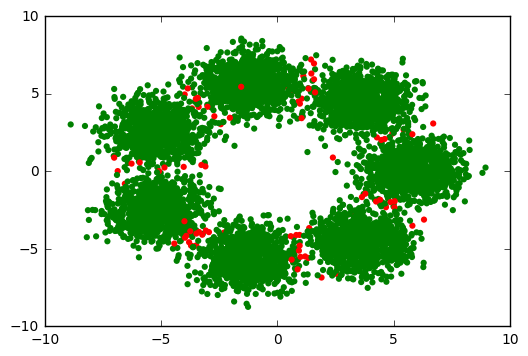

Proportion red to all is 0.012285714285714285


In [15]:
analyzeData(7,5)

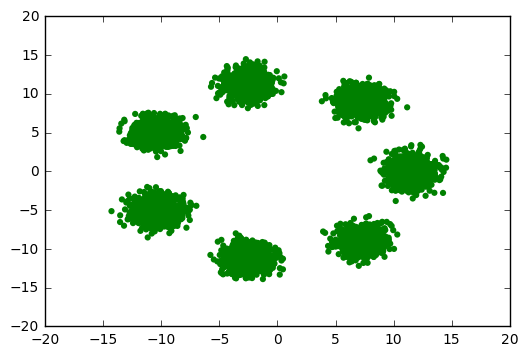

Proportion red to all is 0.0


In [29]:
analyzeData(7,10)

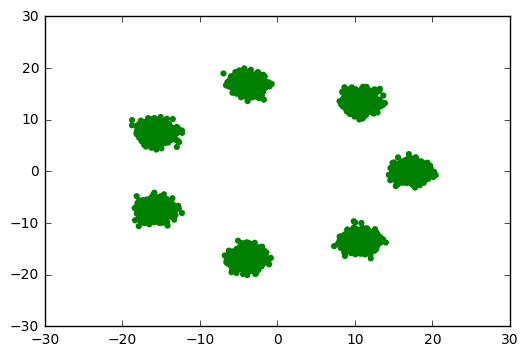

Proportion red to all is 0.0


In [30]:
analyzeData(7,15)

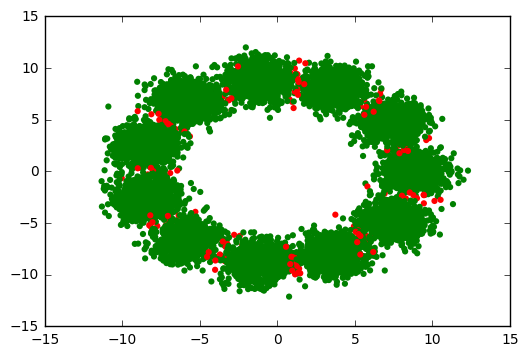

Proportion red to all is 0.013181818181818182


In [31]:
analyzeData(11,5)

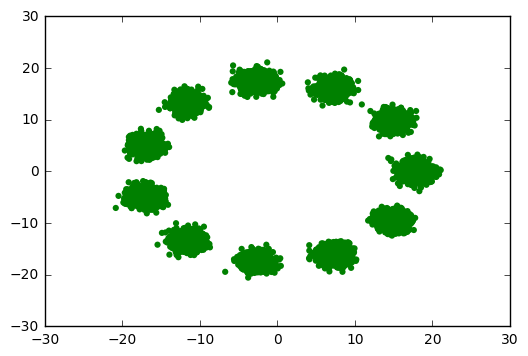

Proportion red to all is 0.0


In [32]:
analyzeData(11,10)

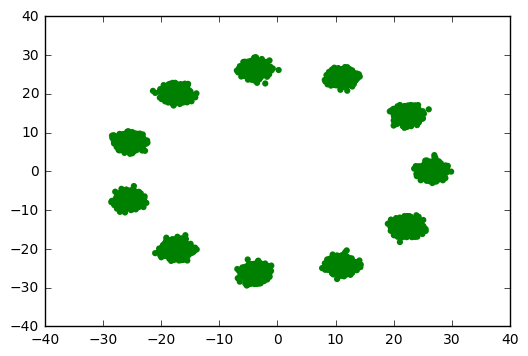

Proportion red to all is 0.0


In [33]:
analyzeData(11,15)

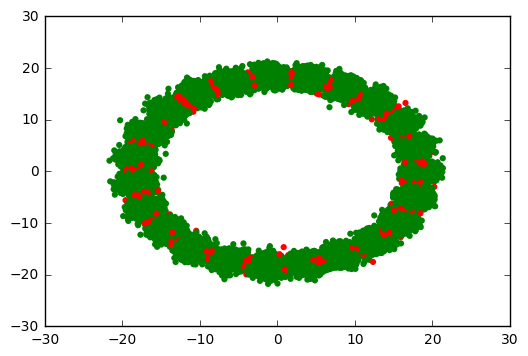

Proportion red to all is 0.013695652173913043


In [34]:
analyzeData(23,5)

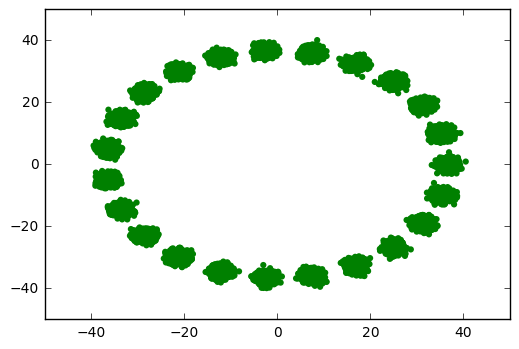

Proportion red to all is 0.0


In [35]:
analyzeData(23,10)

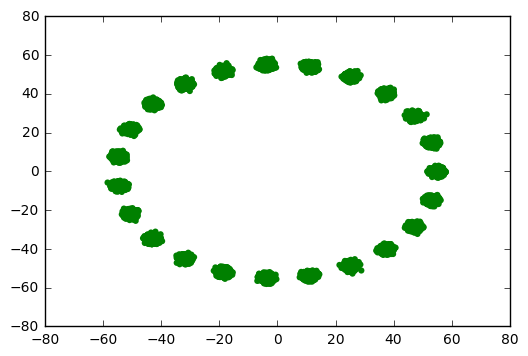

Proportion red to all is 0.0


In [36]:
analyzeData(23,15)

In [23]:
print("Wartość d powinna być około 3.275 by czerwonych było 10%")

Wartość d powinna być pomiedzy 10 a 11 by czerwonych było 10%


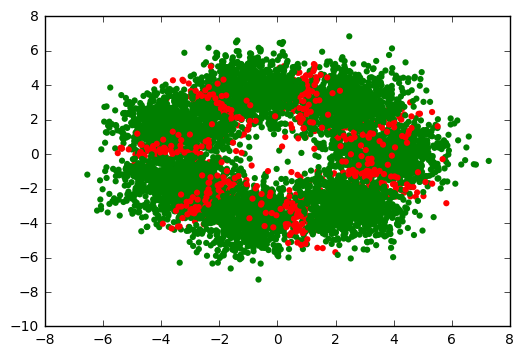

Proportion red to all is 0.10285714285714286


In [42]:
analyzeData(7,3.275)

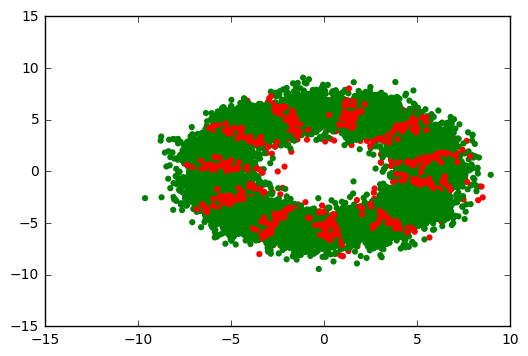

Proportion red to all is 0.1


In [43]:
analyzeData(11,3.275)

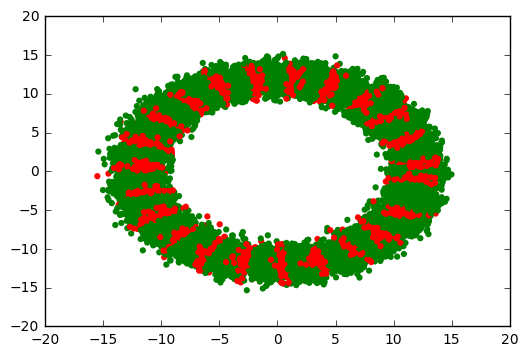

Proportion red to all is 0.10130434782608695


In [44]:
analyzeData(23,3.275)

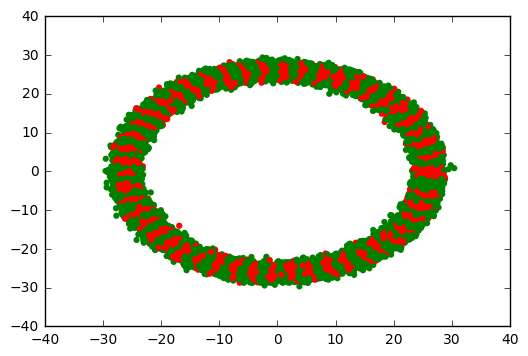

Proportion red to all is 0.10172


In [45]:
analyzeData(50,3.275)